In [ ]:
import time
import numpy as np
import pandas as pd

from keras.datasets import mnist

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# 0. Using ChatGPT to help you understand optimizers

Recently I had an interview question to Deep Learning candidates, and they were not able to answer these questions. 

Write one paragraph with the help of ChatGPT (or equivalent) explaining each one of the following optimizers, and in the last paragraph, reviewed by the notes from the lab last week, write a comparison on the advantages and disadvantages of each one.

- Stochastic Gradient Descent
- SGD with momentum
- RMSProp
- Adadelta
- Adam
- Adam with warmup

Stochastic Gradient Descent (SGD) is an iterative optimization algorithm used in machine learning. It is similar to gradient descent but instead of evaluating the cost function on the entire dataset, it evaluates the cost function on a single sample. The parameters are then adjusted accordingly in order to minimize the cost function. One advantage of using SGD is that it is computationally efficient, as it requires fewer computations than traditional gradient descent.

Stochastic Gradient Descent with Momentum is a modified version of the classic SGD algorithm. It uses the momentum technique to accelerate the learning process by taking into account the direction of the previous gradients and adding a fraction of that direction to the current gradient update. This helps the model to break out of local minima and converge faster to a global minima. The momentum term also helps to reduce oscillations in the gradients that can cause the model to overshoot the minima.

RMSProp (Root Mean Square Propagation) is an adaptive learning rate optimization algorithm that is used to train neural networks. It is an extension of the popular stochastic gradient descent (SGD) algorithm and is used to improve the convergence speed of the network. RMSProp attempts to reduce the oscillation of the gradients by continuously adjusting the learning rate according to the average of the past gradients. This allows the network to quickly converge to a global optimum and prevent it from getting stuck in local minima.

Adadelta is a gradient-based optimization algorithm used to adjust the weights of a neural network. It is an extension of Adagrad, which is an algorithm used to help neural networks learn more quickly and efficiently. Adadelta is an improved version of Adagrad that reduces its aggressive, monotonically decreasing learning rate. Adadelta monitors the improvement of each parameter and adjusts the learning rate accordingly to help prevent overfitting. It also uses a decaying average of the past squared gradients to normalize the gradients. This helps the algorithm to converge faster and more accurately than other optimization algorithms.

Adam (Adaptive Moment Estimation) is an optimization algorithm for deep learning models used to update network weights iteratively based on training data. It helps reduce loss by updating network weights in an adaptive learning rate that is different for each parameter and is based on the estimates of first and second moments of the gradients. Adam optimizer combines the advantages of both AdaGrad and RMSProp and works well on problems with noisy, sparse gradients. It is one of the most popular optimization algorithms for deep learning due to its robustness, speed, and relatively low memory requirements.

Adam with warmup optimizer is a popular optimization algorithm used in deep learning. It is an extension of the Adam optimization algorithm, which is an adaptive learning rate optimization algorithm, that adds warmup, a period of increasing learning rate in the beginning of training. This warmup period allows the model to slowly adjust to the data, helping to prevent overfitting and avoiding the pitfalls of starting with a high learning rate that can cause the model to diverge. The warmup period is also beneficial for regularization, as it helps to reduce the effect of over-parameterization.




SGD: 
Advantages: 
- Can be used on large datasets since only one training example is used at a time.
- Has faster convergence rates than other optimization techniques such as gradient descent.
- Does not require a lot of memory since only one training example is used at a time.

Disadvantages:
- Can be computationally expensive due to the need to compute gradients for every training example.
- Can be sensitive to feature scaling since the learning rate is a function of the data.
- Doesnot perform well on saddle points.

SGD with momentum: 
Advantages: 
- It helps to reduce the oscillations and smooth the gradient updates, which helps to improve the overall accuracy of the model.

Disadvantages:
- Momentum SGD can cause the optimization to become stuck in a local minimum, as it may overshoot the global minimum.

RMSprop: 
Advantages: 
- It is well suited for problems that have high dimensional inputs and outputs.
- It can quickly and efficiently find a local minimum in the error surface of a neural network.

Disadvantages:
- It is sensitive to the size of the mini-batch size, so the mini-batch size must be carefully chosen in order to obtain good results. 
- It is not suitable for applications with noisy data, as it can cause the optimization algorithm to diverge and overfit the model.

ADAdelta: 
Advantages: 
- It is well suited for problems that have high dimensional inputs and outputs.
- It can quickly and efficiently find a local minimum in the error surface of a neural network.

Disadvantages:
- It is sensitive to the size of the mini-batch size, so the mini-batch size must be carefully chosen in order to obtain good results. 
- It is not suitable for applications with noisy data, as it can cause the optimization algorithm to diverge and overfit the model.

Adam: 
Advantages: 
- Adam optimizer is computationally efficient compared to other optimization algorithms such as gradient descent.
- Adam optimizer can help reduce overfitting by using regularization techniques such as L2 regularization and dropout.

Disadvantages:
- Adam optimizer is sensitive to the initialization of the parameters, meaning that if the parameters are initialized incorrectly, the model may not converge to a good solution.
- Adam optimizer requires tuning of the learning rate and other hyperparameters, which can be difficult and time consuming.

Adam with warmup: 
Advantages: 
- reduce the initial variance of the model, which can lead to improved results.

Disadvantages:
- The warmup process can take a long time to converge, which can be a drawback when training on large datasets.





    

# 2. Data Visualization

You should look at https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b, which contains a very nice introduction into visualizing datasets using PCA
and tSNE.

In [1]:
import time
import numpy as np
import pandas as pd

from keras.datasets import mnist

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


2023-02-06 00:24:59.283211: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
x_train = x_train / 255.0

To create a permutation of the inputs, we can just permute the indexes.

In [5]:
indexes = x_train.shape[0]
indexes = np.random.permutation(indexes)
indexes

array([33068,  9322, 20004, ...,   797, 49663,  8161])

In [6]:
x_train = x_train[indexes]
y_train = y_train[indexes]

<Figure size 432x288 with 0 Axes>

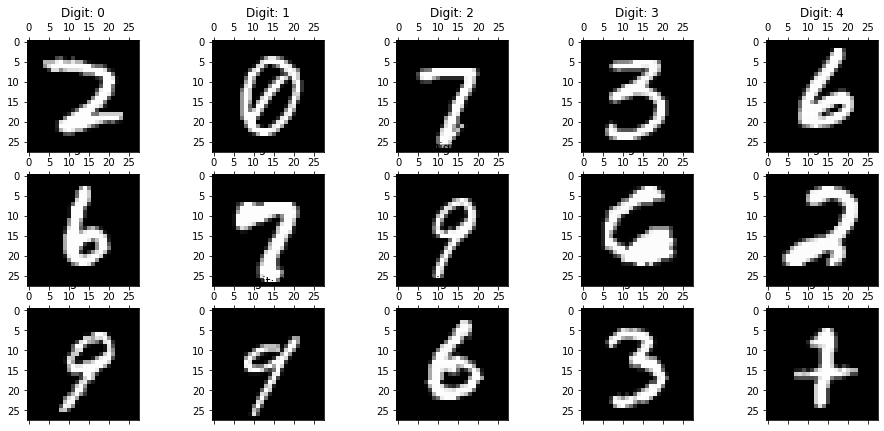

In [7]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    x = x_train[i]
    y = y_train[i]
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(i)))
    ax.matshow(x)
plt.show()


In [8]:
# we will just use the first 10000 samples
x_train_flatten = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
y_train_flatten = y_train.reshape(y_train.shape[0])
#x_train_flatten = x_train_flatten[0:1000]
#y_train_flatten = y_train_flatten[0:1000]
pca = PCA(n_components=3)
pca_result = pca.fit_transform(x_train_flatten)

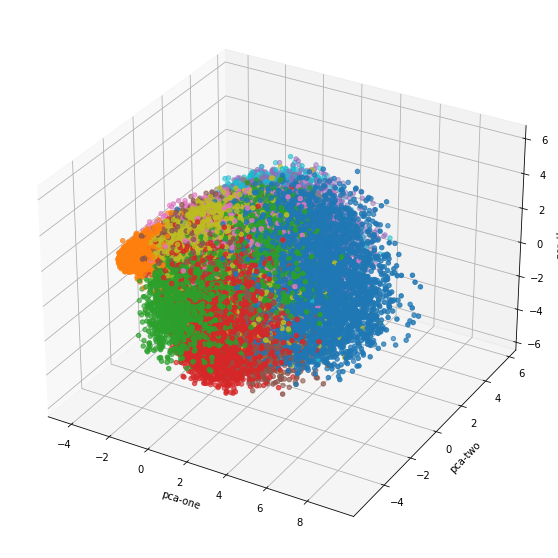

In [10]:
ax = plt.figure(figsize=(16,10)).add_subplot(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=y_train_flatten, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()



In [11]:
# tSNE is very expensive to compute. Let's use only 3000 samples
x_train_flatten = x_train_flatten[0:3000]
y_train_flatten = y_train_flatten[0:3000]
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_train_flatten)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.002s...
[t-SNE] Computed neighbors for 3000 samples in 0.999s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 2.453149
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.024948
[t-SNE] KL divergence after 300 iterations: 2.074880
t-SNE done! Time elapsed: 3.2850148677825928 seconds


In [12]:
data = {"x{}".format(i): x_train_flatten[:, i] for i in range(x_train_flatten.shape[1])}
data["y"] = y_train_flatten
df = pd.DataFrame(data)

In [13]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


<AxesSubplot: >

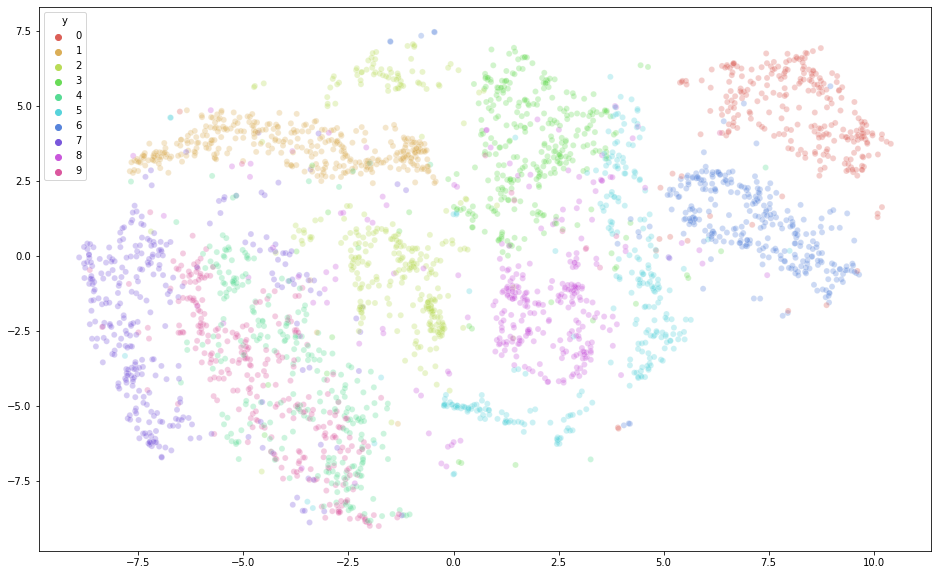

In [14]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)


In [15]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_train_flatten)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8271519455883601


In [16]:
x_train_flatten.shape, y_train_flatten.shape

((3000, 784), (3000,))

In [17]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result_50)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.001s...
[t-SNE] Computed neighbors for 3000 samples in 0.209s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 2.239157
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.531662
[t-SNE] KL divergence after 300 iterations: 1.974531


<AxesSubplot: >

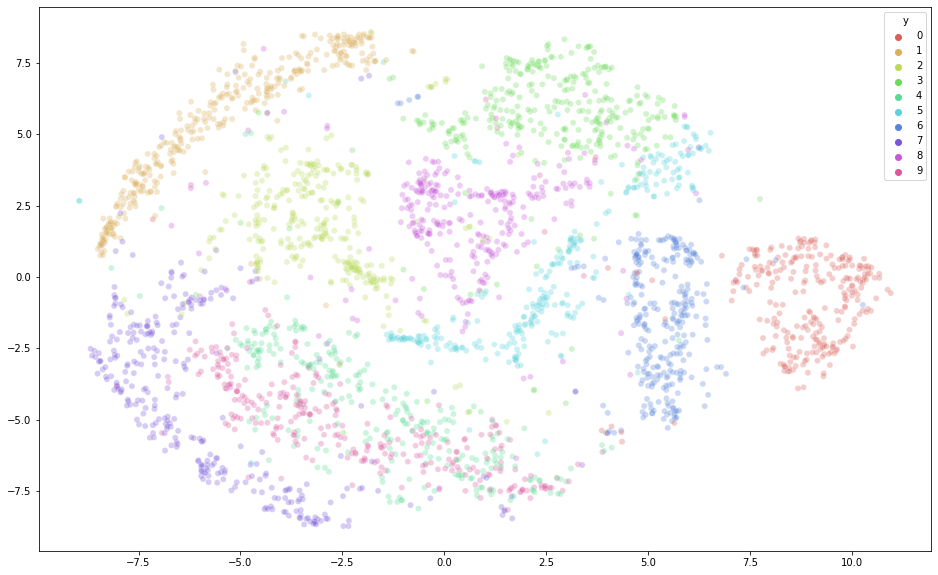

In [18]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

Now, you will perform the same exercise on cifar10 or cifar100.

In [19]:
from keras.datasets import cifar10, cifar100

In [20]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train

indexes = x_train.shape[0]
indexes = np.random.permutation(indexes)
x_train = x_train[indexes]
y_train = y_train[indexes]

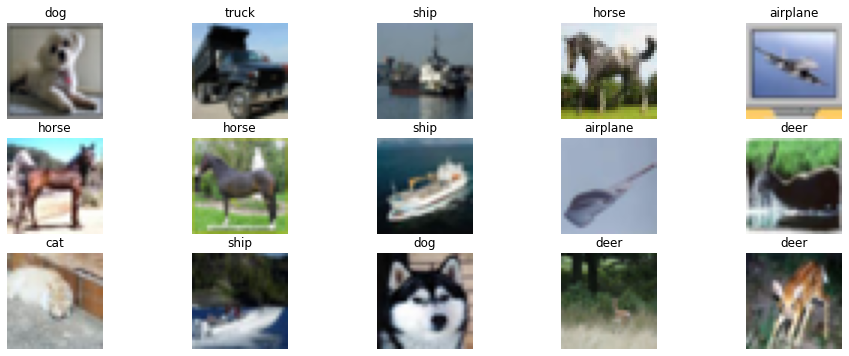

In [21]:

LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure( figsize=(16,6) )
for i in range(0,15):
    x = x_train[i]
    y = LABELS[int(y_train[i])]
    ax = fig.add_subplot(3,5,i+1, title="{}".format(y))
    ax.imshow(x)
    ax.axis('off')
plt.show()

In [22]:
x_train_flatten = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
y_train_flatten = y_train.reshape(y_train.shape[0])

pca = PCA(n_components=3)
pca_result = pca.fit_transform(x_train_flatten)

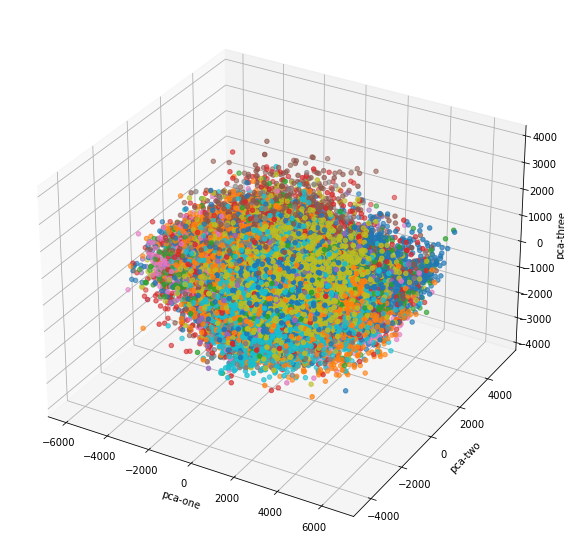

In [24]:
ax = plt.figure(figsize=(16,10)).add_subplot(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=y_train_flatten, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [25]:
# tSNE is very expensive to compute. Let's use only 3000 samples
x_train_flatten = x_train_flatten[0:3000]
y_train_flatten = y_train_flatten[0:3000]
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_train_flatten)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.004s...
[t-SNE] Computed neighbors for 3000 samples in 3.360s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 870.939629
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.876144
[t-SNE] KL divergence after 300 iterations: 2.440697
t-SNE done! Time elapsed: 6.142642021179199 seconds


In [26]:
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.543s...
[t-SNE] Computed neighbors for 3000 samples in 50.092s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 780.787143
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.241035
[t-SNE] Error after 300 iterations: 2.513908
t-SNE done! Time elapsed: 88.5780680179596 seconds
data = {"x{}".format(i): x_train_flatten[:, i] for i in range(x_train_flatten.shape[1])}

# to_label = lambda y: LABELS[int(y_train[i])]
# label_func = np.vectorize(to_label)
data["y"] = y_train_flatten
df = pd.DataFrame(data)

SyntaxError: invalid decimal literal (3038438282.py, line 2)

In [27]:

df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


<AxesSubplot: >

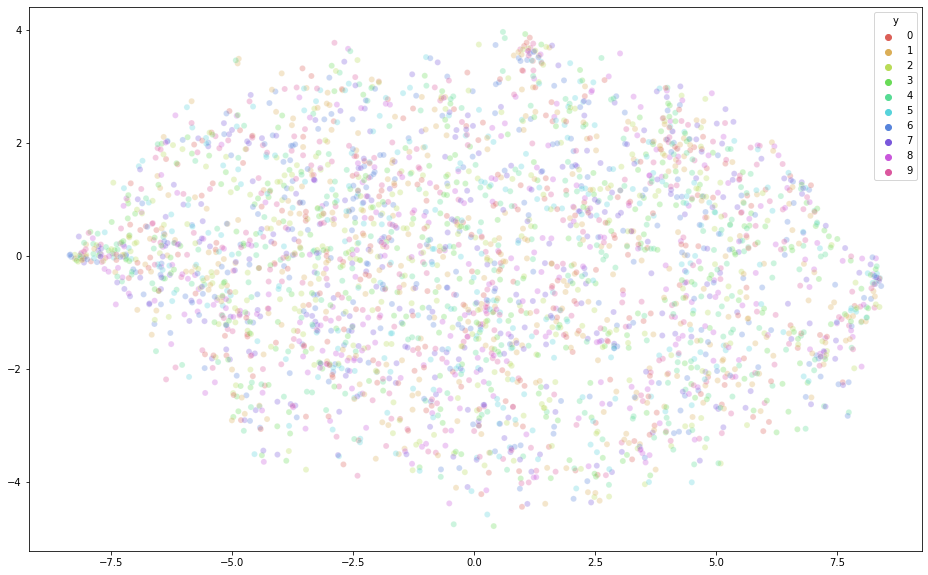

In [28]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

In [29]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_train_flatten)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8431981233509515


In [30]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result_50)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.001s...
[t-SNE] Computed neighbors for 3000 samples in 0.225s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 812.071731
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.348785
[t-SNE] KL divergence after 300 iterations: 2.493262


<AxesSubplot: >

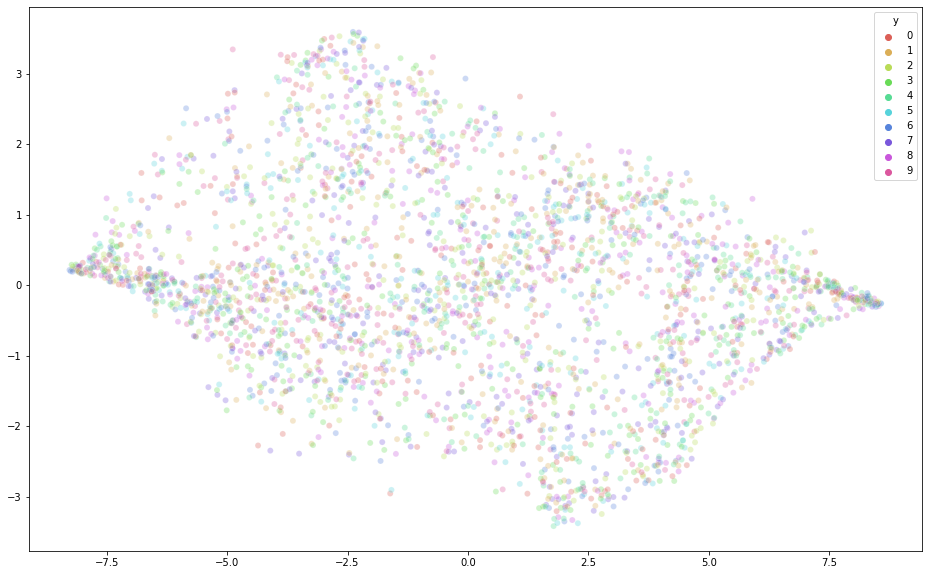

In [31]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

CIFAR 100

In [32]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = x_train

indexes = x_train.shape[0]
indexes = np.random.permutation(indexes)
x_train = x_train[indexes]
y_train = y_train[indexes]

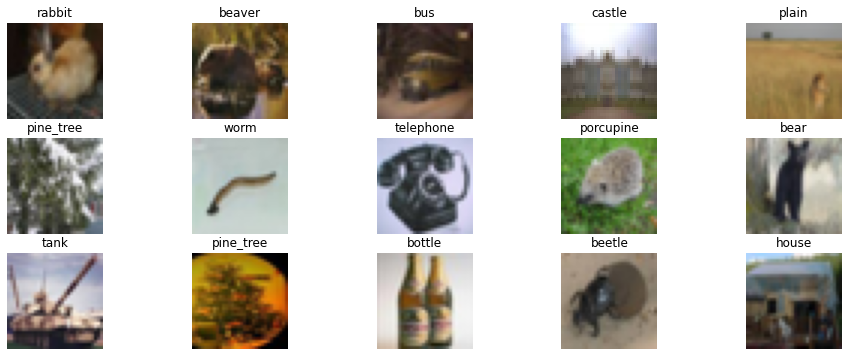

In [33]:
LABELS = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

fig = plt.figure( figsize=(16,6) )
for i in range(0,15):
    x = x_train[i]
    y = LABELS[int(y_train[i])]
    ax = fig.add_subplot(3,5,i+1, title="{}".format(y))
    ax.imshow(x)
    ax.axis('off')
plt.show()

In [34]:
x_train_flatten = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
y_train_flatten = y_train.reshape(y_train.shape[0])

pca = PCA(n_components=3)
pca_result = pca.fit_transform(x_train_flatten)

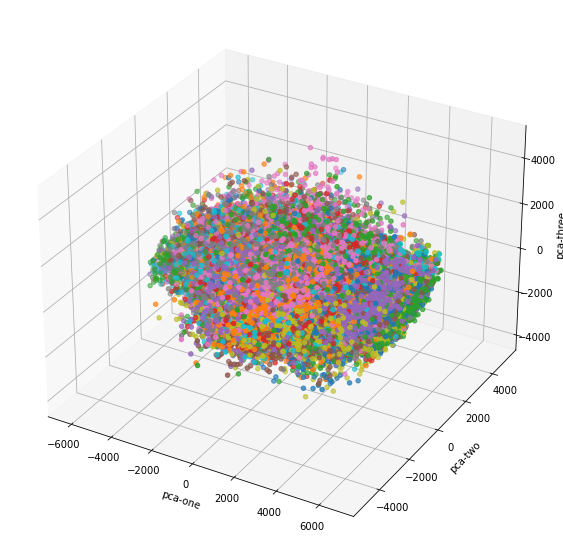

In [36]:
ax = plt.figure(figsize=(16,10)).add_subplot(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=y_train_flatten, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [37]:
# tSNE is very expensive to compute. Let's use only 3000 samples
x_train_flatten = x_train_flatten[0:3000]
y_train_flatten = y_train_flatten[0:3000]
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_train_flatten)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.004s...
[t-SNE] Computed neighbors for 3000 samples in 3.841s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 945.713036
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.841499
[t-SNE] KL divergence after 300 iterations: 2.449463
t-SNE done! Time elapsed: 6.322965860366821 seconds


In [38]:
data = {"x{}".format(i): x_train_flatten[:, i] for i in range(x_train_flatten.shape[1])}

# to_label = lambda y: LABELS[int(y_train[i])]
# label_func = np.vectorize(to_label)
data["y"] = y_train_flatten
df = pd.DataFrame(data)

In [39]:

df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x3063,x3064,x3065,x3066,x3067,x3068,x3069,x3070,x3071,y
0,25,18,15,23,16,13,27,19,17,23,...,87,81,75,86,85,83,54,57,56,65
1,159,134,72,135,109,54,131,104,54,137,...,132,93,37,124,86,33,114,79,31,4
2,30,25,25,34,30,29,38,33,32,44,...,102,75,68,99,73,67,96,72,61,13
3,200,208,245,205,214,246,218,230,246,233,...,73,77,48,69,74,44,67,72,42,17
4,150,150,150,149,149,149,150,150,150,151,...,147,114,59,145,114,59,144,112,59,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,255,255,255,255,255,255,255,255,255,255,...,62,2,1,59,0,1,52,0,1,0
2996,234,255,255,237,255,255,242,255,255,245,...,152,154,153,155,157,156,148,150,149,90
2997,189,159,135,189,159,135,187,159,133,184,...,182,153,129,184,154,130,185,156,132,93
2998,97,41,7,103,46,6,108,47,8,104,...,172,152,132,162,145,123,163,148,125,9


<AxesSubplot: >

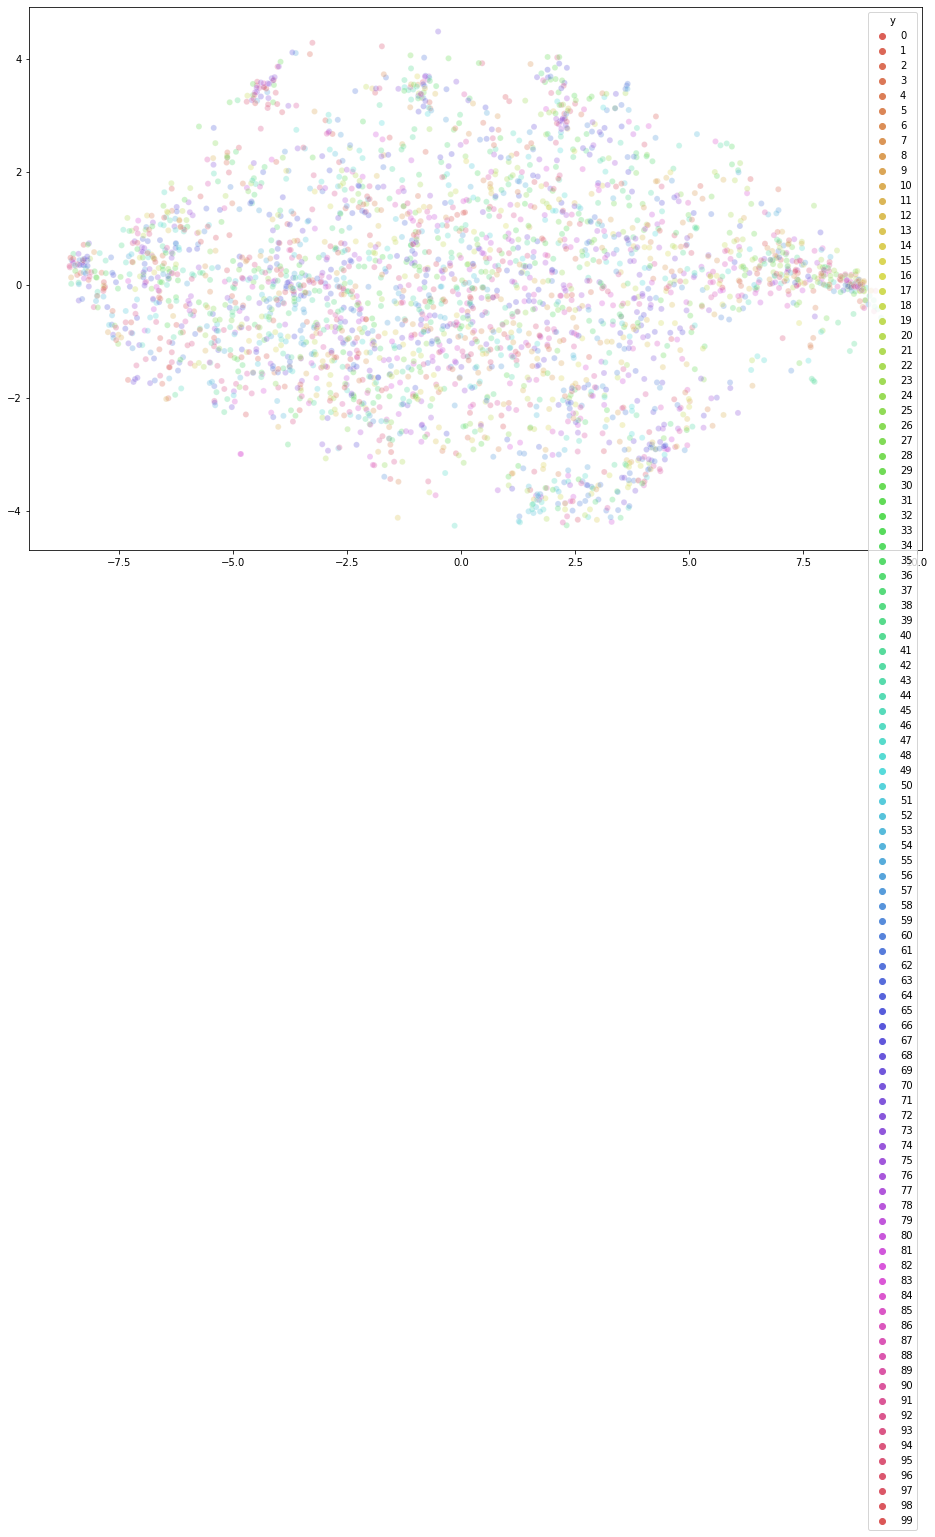

In [40]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue="y",
    palette=sns.color_palette("hls", 100),
    data=df,
    legend="full",
    alpha=0.3
)

In [41]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_train_flatten)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8615305117450507


In [42]:

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result_50)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.001s...
[t-SNE] Computed neighbors for 3000 samples in 0.206s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 874.115122
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.286812
[t-SNE] KL divergence after 300 iterations: 2.658534


<AxesSubplot: >

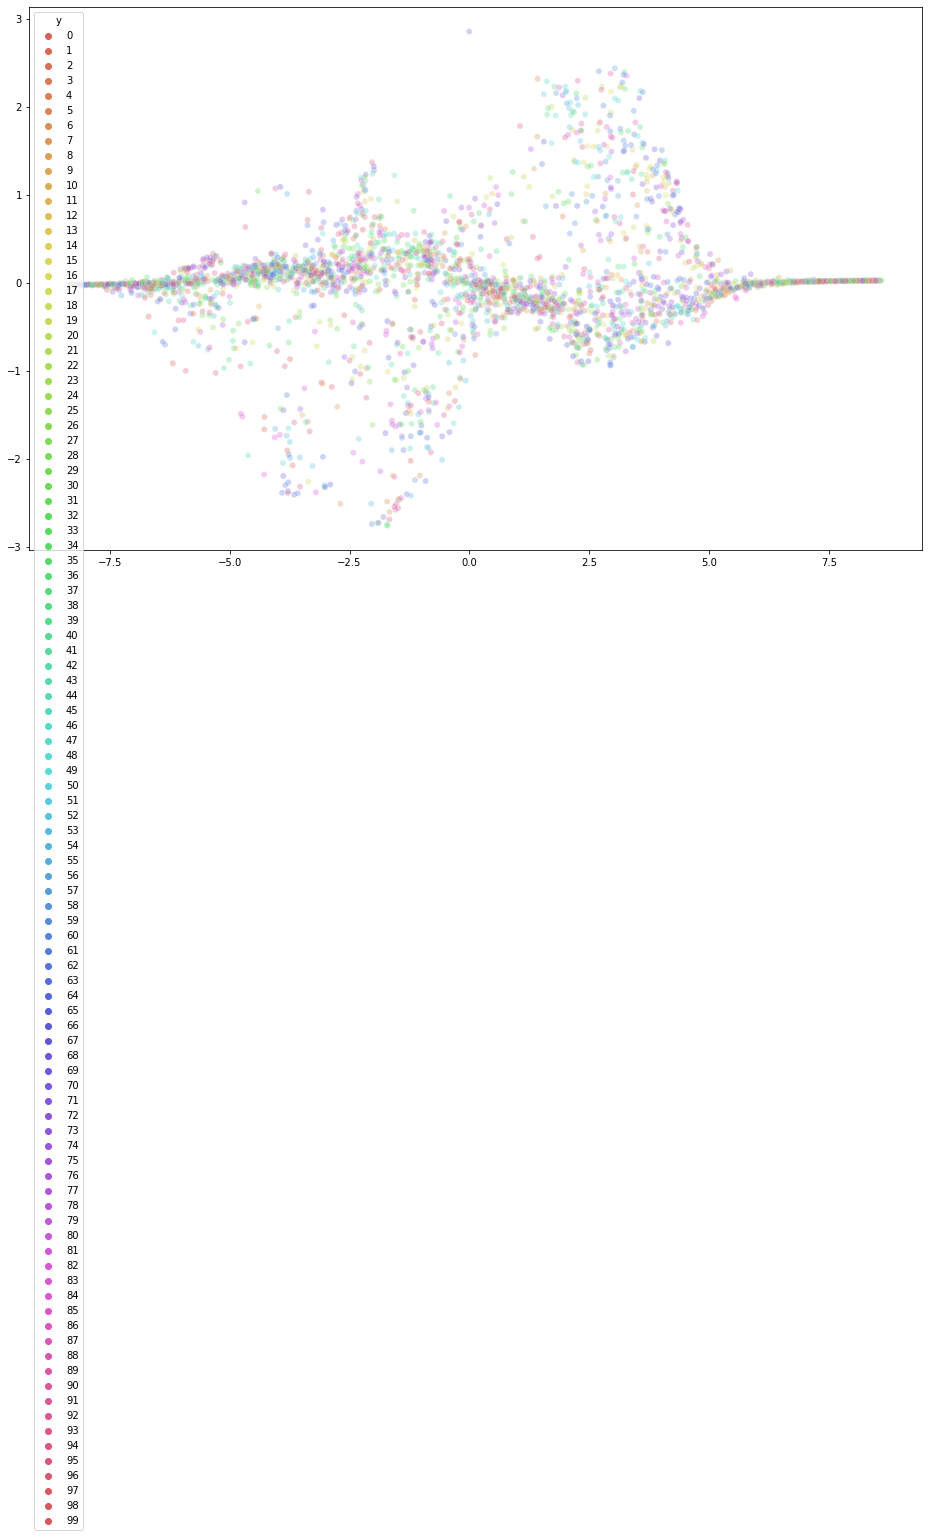

In [43]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue="y",
    palette=sns.color_palette("hls", 100),
    data=df,
    legend="full",
    alpha=0.3
)

Explain with your own words how PCA (SVD if you remove mean(x)) and tSNE works.  You should leverage ChatGPT to write the paragraphs, but of course, I will be checking if you left ChatGPT generating the sentences and it ended up writing garbage.

PCA is an unsupervised learning algorithm that reduces the dimensionality of data by projecting the data onto a new set of orthogonal axes. It identifies the directions of maximum variance in the data and projects it onto a new set of axes. This helps to reduce the complexity of the data while preserving the maximum amount of information.Basically, PCA looks at the data and looks for groups of variables that are related to each other. For example, if you have a lot of data about different types of animals, PCA can help you see which animals are most similar to each other. 

tSNE is an unsupervised learning algorithm that reduces the dimensionality of data by projecting the data onto a two-dimensional map. It works by mapping data points from a higher-dimensional space into a lower-dimensional space, so that the data points can be visualized in 2D or 3D. t-SNE uses a probabilistic approach to identify regions of high density in the data and then uses a gradient-based optimization algorithm to create a low-dimensional map of the data.Similar to above example if you have data about different types of animals, tSNE can help you see which animals are most similar to each other in a visual way. 

If dimesion of dataset is small it is ideal to use PCA for 2D or 3D or else tSNE should be used.